# Plot data

Autors: Juan Guarín, Angelica Angarita, Andrés Ferreira \
Codes: 2201870, 2200801, 2201764

### Average velocity

The instantaneous velocity is the derivate of the position in time and can be approximated to the average velocity when $\Delta t \to 0$. The average velocity is the change in position divided by the change in time.

This code plots the data obtained from the lab practice of the average velocity. Also, it plots in the same figure the average velocity that was expected according to our theoretical model.

It was consider an one dimensional movement in $x$ axis, that had a constant acceleration of $a = g \sin \theta$. The initial position were $x_0$ with a velocity $v_i=0$. Then, the ecuations consider in the data for the code were:

\begin{equation}
    x(t) = x_0 + g \sin \theta \frac{t^2}{2}
\end{equation}

\begin{equation}
    v(t) = g \sin \theta t
\end{equation}

Solving for $t$ in $x(t)$, we obtained:

\begin{equation}
    t(x) = \sqrt{ \frac{2(x-x_0)}{g \sin \theta} }
\end{equation}

Using the expresión $v_m = \frac{\Delta x}{\Delta t}$ and changing $\Delta t$ by $t(x + \Delta t /2) - t(x - \Delta t/2)$ it was find a theoretical equation for the average velocity:

\begin{equation}
    v_m = \frac{\Delta x}{\sqrt{ \frac{2(x + \Delta x/2-x_0)}{g \sin \theta} } - \sqrt{ \frac{2(x-\Delta x/2-x_0)}{g \sin \theta} }}
\end{equation}

\begin{equation}
    v_m = \frac{\Delta x \sqrt{g \sin \theta / 2} }{\sqrt{x -x_0 + \Delta x/2} - \sqrt{ x- x_0 -\Delta x/2 }}
\end{equation}

The structure of this code is the next:

* Importing libraries
* Reading data
* Finding theoretical data
* Plotting the data

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Reading data

In [3]:
data = np.loadtxt('data_vel.txt', skiprows=1)

Deltax = data[:,0]
dx = np.ones(len(Deltax))*0.2

v = data[:,1]
dv = data[:,2]

In [4]:
v

array([40.81114416, 39.07165742, 35.04836675, 47.22327163, 46.69624095,
       41.92073171])

### Finding theoretical data

In [24]:
# Define the function
def average_vel(Deltax):
    """
    @params:
        Deltax: float or array
        It is the change in position of the object
    
    @returns:
        velocity: float or array
        It is the average velocity of the object acording to its
        change in position
    """
    
    # Parameters of the function:
    x = 100
    x0 = 50
    g = 980
    theta = 1.2032998
    theta = np.deg2rad(theta)
    
    num = Deltax * np.sqrt(g * np.sin(theta) / 2)
    denom = np.sqrt(x-x0+Deltax/2) - np.sqrt(x-x0-Deltax/2)
    velocity = num / denom
    
    return velocity

In [25]:
# Creating the data

Deltax2 = np.linspace(Deltax[0], Deltax[-1], 250)
v2 = average_vel(Deltax2)

### Plotting the data 

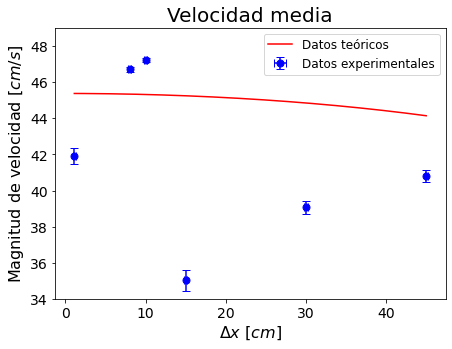

In [28]:
plt.figure(figsize=(7, 5))

(_, caps, _) = plt.errorbar(Deltax, v, xerr= dx, yerr= dv, fmt= 'ob',markersize=7, 
                            capsize=4, ecolor = 'blue', label='Datos experimentales')

plt.plot(Deltax2, v2, '-r', markersize=7, label='Datos teóricos')

# Add a title and changing its font size, and inserting location of the legend
plt.title('Velocidad media', fontsize = 20)
plt.ylim(34,49)
plt.legend(fontsize = 12, loc='upper right')

# Add a name and font size to the labels of axis
plt.xlabel(R'$\Delta x$ [$cm$]', fontsize = 16)
plt.ylabel(R'Magnitud de velocidad [$cm/s$]', fontsize = 16)

# Modify the font size of the values in the axis
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('average_vels.png', format='png') #Save the image in the computer
plt.show() #show the plots